In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output

from tsnake.initialize import compute_masked_regions

# Load image + create dummy mask

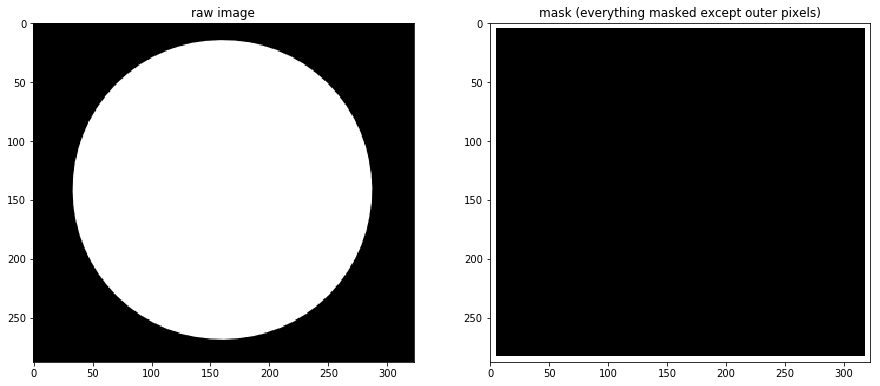

In [2]:
img_path = '../examples/test/circle.png'

image = cv2.imread(img_path, 0)
mask = np.zeros_like(image)
mask[5:-5, 5:-5] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 20))
ax1.set_title('raw image')
ax2.set_title('mask (everything masked except outer pixels)')
ax1.imshow(image, cmap=plt.cm.binary)
ax2.imshow(mask, cmap=plt.cm.binary)
plt.show()

# Initialize T-snake

NORM FOR ELEMENT 0: [39.  0.]
NORM FOR ELEMENT 1: [39.  0.]
NORM FOR ELEMENT 2: [39.  0.]
NORM FOR ELEMENT 3: [39.  0.]
NORM FOR ELEMENT 4: [39.  0.]
NORM FOR ELEMENT 5: [39.  0.]
NORM FOR ELEMENT 6: [39.  0.]
NORM FOR ELEMENT 7: [38. -1.]
NORM FOR ELEMENT 8: [ -0. -39.]
NORM FOR ELEMENT 9: [ -0. -39.]
NORM FOR ELEMENT 10: [ -0. -39.]
NORM FOR ELEMENT 11: [ -0. -39.]
NORM FOR ELEMENT 12: [ -0. -39.]
NORM FOR ELEMENT 13: [ -0. -39.]
NORM FOR ELEMENT 14: [ -0. -39.]
NORM FOR ELEMENT 15: [-37.  -2.]
NORM FOR ELEMENT 16: [-39.   0.]
NORM FOR ELEMENT 17: [-39.   0.]
NORM FOR ELEMENT 18: [-39.   0.]
NORM FOR ELEMENT 19: [-39.   0.]
NORM FOR ELEMENT 20: [-39.   0.]
NORM FOR ELEMENT 21: [-39.   0.]
NORM FOR ELEMENT 22: [-39.   0.]
NORM FOR ELEMENT 23: [-1. 38.]
NORM FOR ELEMENT 24: [-0. 39.]
NORM FOR ELEMENT 25: [-0. 39.]
NORM FOR ELEMENT 26: [-0. 39.]
NORM FOR ELEMENT 27: [-0. 39.]
NORM FOR ELEMENT 28: [-0. 39.]
NORM FOR ELEMENT 29: [-0. 39.]
NORM FOR ELEMENT 30: [-0.  4.]


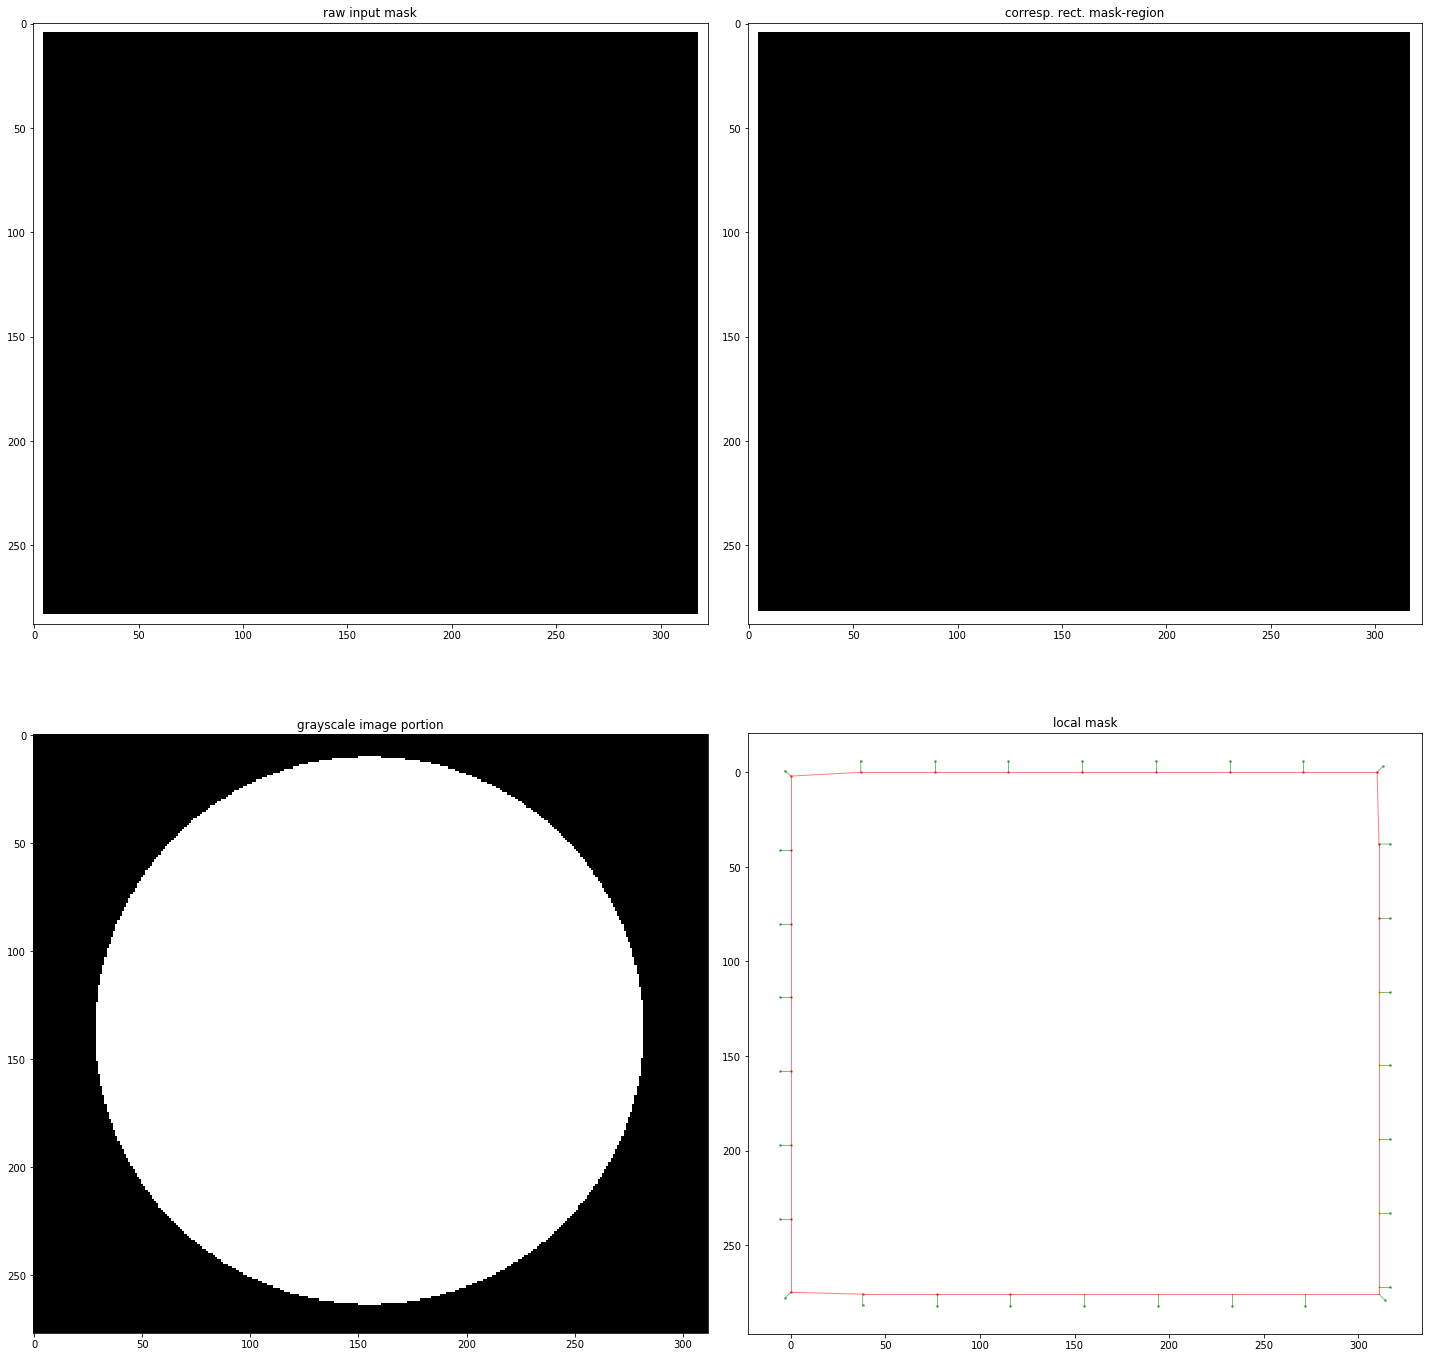

In [3]:
N = 30       # 30 nodes 
p = 1.0      # scale for Eq (7)
c = 2.0      # scale for Eq (A.4)
a = 1.0      # tension param in Eq (8)
b = 1.0      # bending param in Eq (8)
gamma = 1.0  # friction param in Eq (8)
dt = 0.01    # step size in Eq (8) 
sigma = 5.0  # gaussian filter param in Eq (A.4)

region = compute_masked_regions(image, mask)[0]
region.initialize_tsnake(N, p, c, sigma, a, b, gamma, dt)
region.visualize()

snake = region._initial_tsnake

# Evolve T-snake

In [4]:
# region.show_snake()
# input()
# clear_output()

M = 100
for i in range(M):
    print('========================================')
    print('iter %d' % i)
    snake.m_step(1)
#     region.show_snake()
    
#     input()
#     clear_output()
    
region.show_snake()

iter 0
NORM FOR ELEMENT 0: [39.  0.]
NORM FOR ELEMENT 1: [39.  0.]
NORM FOR ELEMENT 2: [39.  0.]
NORM FOR ELEMENT 3: [39.  0.]
NORM FOR ELEMENT 4: [39.  0.]
NORM FOR ELEMENT 5: [39.  0.]
NORM FOR ELEMENT 6: [39.  0.]
NORM FOR ELEMENT 7: [38. -1.]
NORM FOR ELEMENT 8: [ -0. -39.]
NORM FOR ELEMENT 9: [ -0. -39.]
NORM FOR ELEMENT 10: [ -0. -39.]
NORM FOR ELEMENT 11: [ -0. -39.]
NORM FOR ELEMENT 12: [ -0. -39.]
NORM FOR ELEMENT 13: [ -0. -39.]
NORM FOR ELEMENT 14: [ -0. -39.]
NORM FOR ELEMENT 15: [-37.  -2.]
NORM FOR ELEMENT 16: [-39.   0.]
NORM FOR ELEMENT 17: [-39.   0.]
NORM FOR ELEMENT 18: [-39.   0.]
NORM FOR ELEMENT 19: [-39.   0.]
NORM FOR ELEMENT 20: [-39.   0.]
NORM FOR ELEMENT 21: [-39.   0.]
NORM FOR ELEMENT 22: [-39.   0.]
NORM FOR ELEMENT 23: [-1. 38.]
NORM FOR ELEMENT 24: [-0. 39.]
NORM FOR ELEMENT 25: [-0. 39.]
NORM FOR ELEMENT 26: [-0. 39.]
NORM FOR ELEMENT 27: [-0. 39.]
NORM FOR ELEMENT 28: [-0. 39.]
NORM FOR ELEMENT 29: [-0. 39.]
NORM FOR ELEMENT 30: [-0.  4.]
iter 1
NORM 

NORM FOR ELEMENT 18: [-83.131134 131.05206 ]
NORM FOR ELEMENT 19: [ -15.075535 -166.92729 ]
NORM FOR ELEMENT 20: [-67.365715 -36.26914 ]
NORM FOR ELEMENT 21: [12.709358   -0.08317878]
NORM FOR ELEMENT 22: [-26.416933   2.298888]
NORM FOR ELEMENT 23: [-0.       34.143394]
NORM FOR ELEMENT 24: [-0.       40.036423]
NORM FOR ELEMENT 25: [-0.       39.494556]
NORM FOR ELEMENT 26: [-0.       39.077236]
NORM FOR ELEMENT 27: [-0.       39.451157]
NORM FOR ELEMENT 28: [-0.       39.471973]
NORM FOR ELEMENT 29: [-0.       32.198284]
NORM FOR ELEMENT 30: [-0.        9.828087]
iter 10
NORM FOR ELEMENT 0: [36.38117  0.     ]
NORM FOR ELEMENT 1: [41.062958  0.      ]
NORM FOR ELEMENT 2: [39.57776  0.     ]
NORM FOR ELEMENT 3: [38.978725  0.      ]
NORM FOR ELEMENT 4: [38.99363  0.     ]
NORM FOR ELEMENT 5: [39.599022  0.      ]
NORM FOR ELEMENT 6: [40.84738  0.     ]
NORM FOR ELEMENT 7: [35.559357  0.      ]
NORM FOR ELEMENT 8: [ -0.     -37.1967]
NORM FOR ELEMENT 9: [ -0.      -41.26788]
NORM FOR 

NORM FOR ELEMENT 21: [-15.941836   0.      ]
NORM FOR ELEMENT 22: [-16.479641     0.96069306]
NORM FOR ELEMENT 23: [-0.       34.402985]
NORM FOR ELEMENT 24: [-0.      40.39271]
NORM FOR ELEMENT 25: [-0.       40.062157]
NORM FOR ELEMENT 26: [-0.      39.47921]
NORM FOR ELEMENT 27: [-0.      39.75499]
NORM FOR ELEMENT 28: [-0.       38.262535]
NORM FOR ELEMENT 29: [-0.       29.558973]
NORM FOR ELEMENT 30: [-0.       13.125742]
iter 20
NORM FOR ELEMENT 0: [34.870724  0.      ]
NORM FOR ELEMENT 1: [41.670967  0.      ]
NORM FOR ELEMENT 2: [40.336266  0.      ]
NORM FOR ELEMENT 3: [39.130566  0.      ]
NORM FOR ELEMENT 4: [39.146515  0.      ]
NORM FOR ELEMENT 5: [40.29916  0.     ]
NORM FOR ELEMENT 6: [41.335457  0.      ]
NORM FOR ELEMENT 7: [34.210346  0.      ]
NORM FOR ELEMENT 8: [ -0.      -35.52356]
NORM FOR ELEMENT 9: [ -0.      -41.98255]
NORM FOR ELEMENT 10: [ -0.      -40.33508]
NORM FOR ELEMENT 11: [ -0.       -39.292206]
NORM FOR ELEMENT 12: [ -0.       -40.326397]
NORM FOR 

NORM FOR ELEMENT 29: [-0.       28.657244]
NORM FOR ELEMENT 30: [-0.       15.018132]
iter 30
NORM FOR ELEMENT 0: [33.867516  0.      ]
NORM FOR ELEMENT 1: [41.781506  0.      ]
NORM FOR ELEMENT 2: [40.92242  0.     ]
NORM FOR ELEMENT 3: [39.447247  0.      ]
NORM FOR ELEMENT 4: [39.446636  0.      ]
NORM FOR ELEMENT 5: [40.82517  0.     ]
NORM FOR ELEMENT 6: [41.40745  0.     ]
NORM FOR ELEMENT 7: [33.30205  0.     ]
NORM FOR ELEMENT 8: [ -0.       -34.417866]
NORM FOR ELEMENT 9: [ -0.      -42.10904]
NORM FOR ELEMENT 10: [ -0.       -41.006004]
NORM FOR ELEMENT 11: [ -0.       -39.886547]
NORM FOR ELEMENT 12: [ -0.       -41.036404]
NORM FOR ELEMENT 13: [ -0.       -42.440075]
NORM FOR ELEMENT 14: [ -0.      -35.10406]
NORM FOR ELEMENT 15: [-14.138574   0.      ]
NORM FOR ELEMENT 16: [-25.597542    7.5470314]
NORM FOR ELEMENT 17: [-78.94741  64.24271]
NORM FOR ELEMENT 18: [-79.674446  33.162388]
NORM FOR ELEMENT 19: [-52.313915 -51.318645]
NORM FOR ELEMENT 20: [-31.64545  -48.554676]

NORM FOR ELEMENT 2: [41.34268  0.     ]
NORM FOR ELEMENT 3: [39.846046  0.      ]
NORM FOR ELEMENT 4: [39.824654  0.      ]
NORM FOR ELEMENT 5: [41.198353  0.      ]
NORM FOR ELEMENT 6: [41.31964  0.     ]
NORM FOR ELEMENT 7: [32.631058  0.      ]
NORM FOR ELEMENT 8: [ -0.       -33.604893]
NORM FOR ELEMENT 9: [ -0.       -42.028572]
NORM FOR ELEMENT 10: [ -0.      -41.54776]
NORM FOR ELEMENT 11: [ -0.       -40.572983]
NORM FOR ELEMENT 12: [ -0.       -41.651936]
NORM FOR ELEMENT 13: [ -0.       -42.440044]
NORM FOR ELEMENT 14: [ -0.      -34.15381]
NORM FOR ELEMENT 15: [-17.03675   0.     ]
NORM FOR ELEMENT 16: [-39.072807    7.3249683]
NORM FOR ELEMENT 17: [-63.460922  56.59883 ]
NORM FOR ELEMENT 18: [-73.9471    24.021671]
NORM FOR ELEMENT 19: [-56.807343 -34.994587]
NORM FOR ELEMENT 20: [-32.07425  -41.869312]
NORM FOR ELEMENT 21: [-13.676748 -11.081574]
NORM FOR ELEMENT 22: [-14.924085   0.      ]
NORM FOR ELEMENT 23: [-0.      32.93357]
NORM FOR ELEMENT 24: [-0.      41.33141]
N

NORM FOR ELEMENT 5: [41.47005  0.     ]
NORM FOR ELEMENT 6: [41.16966  0.     ]
NORM FOR ELEMENT 7: [32.102222  0.      ]
NORM FOR ELEMENT 8: [ -0.      -32.96515]
NORM FOR ELEMENT 9: [ -0.      -41.88186]
NORM FOR ELEMENT 10: [ -0.       -41.994915]
NORM FOR ELEMENT 11: [ -0.       -41.250614]
NORM FOR ELEMENT 12: [ -0.      -42.15786]
NORM FOR ELEMENT 13: [ -0.    -42.312]
NORM FOR ELEMENT 14: [ -0.       -33.437607]
NORM FOR ELEMENT 15: [-21.684996   0.      ]
NORM FOR ELEMENT 16: [-44.079937    4.8321633]
NORM FOR ELEMENT 17: [-56.822147  50.53804 ]
NORM FOR ELEMENT 18: [-68.43697   21.354383]
NORM FOR ELEMENT 19: [-58.073627 -24.474373]
NORM FOR ELEMENT 20: [-31.107094 -36.06209 ]
NORM FOR ELEMENT 21: [-13.889097 -16.188122]
NORM FOR ELEMENT 22: [-16.906126   0.      ]
NORM FOR ELEMENT 23: [-0.       32.221558]
NORM FOR ELEMENT 24: [-0.       41.366722]
NORM FOR ELEMENT 25: [-0.       41.711845]
NORM FOR ELEMENT 26: [-0.       40.596817]
NORM FOR ELEMENT 27: [-0.       39.120594]


NORM FOR ELEMENT 13: [ -0.       -42.141148]
NORM FOR ELEMENT 14: [ -0.       -32.880066]
NORM FOR ELEMENT 15: [-25.635654   0.      ]
NORM FOR ELEMENT 16: [-46.606464     0.83721566]
NORM FOR ELEMENT 17: [-53.531406  46.291485]
NORM FOR ELEMENT 18: [-64.135216  21.033596]
NORM FOR ELEMENT 19: [-58.897064 -16.133747]
NORM FOR ELEMENT 20: [-39.626255 -24.574306]
NORM FOR ELEMENT 21: [-14.769501 -27.45424 ]
NORM FOR ELEMENT 22: [-7.79844  0.     ]
NORM FOR ELEMENT 23: [-0.       31.584938]
NORM FOR ELEMENT 24: [-0.       41.394505]
NORM FOR ELEMENT 25: [-0.       42.080322]
NORM FOR ELEMENT 26: [-0.       40.811928]
NORM FOR ELEMENT 27: [-0.       38.878136]
NORM FOR ELEMENT 28: [-0.       35.047935]
NORM FOR ELEMENT 29: [-0.       28.395615]
NORM FOR ELEMENT 30: [-0.       17.806622]
iter 61
NORM FOR ELEMENT 0: [32.045994  0.      ]
NORM FOR ELEMENT 1: [41.362534  0.      ]
NORM FOR ELEMENT 2: [41.900555  0.      ]
NORM FOR ELEMENT 3: [40.720646  0.      ]
NORM FOR ELEMENT 4: [40.665024

NORM FOR ELEMENT 20: [-46.472885 -17.688988]
NORM FOR ELEMENT 21: [-15.503858 -34.473827]
NORM FOR ELEMENT 22: [-0.  0.]
NORM FOR ELEMENT 23: [-0.       31.060658]
NORM FOR ELEMENT 24: [-0.      41.36959]
NORM FOR ELEMENT 25: [-0.       42.356087]
NORM FOR ELEMENT 26: [-0.      40.96771]
NORM FOR ELEMENT 27: [-0.      38.68661]
NORM FOR ELEMENT 28: [-0.       34.765327]
NORM FOR ELEMENT 29: [-0.       28.499773]
NORM FOR ELEMENT 30: [-0.       18.294249]
iter 71


/home/zimmermancole/cs269/t-snake-capstone/tsnake/snake.py:154: RuntimeWarning: invalid value encountered in true_divide
  norm /= np.sum(np.abs(norm))
/home/zimmermancole/cs269/t-snake-capstone/tsnake/snake.py:195: RuntimeWarning: invalid value encountered in true_divide
  norm /= np.sum(np.abs(norm))


ValueError: array must not contain infs or NaNs